In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [7]:
import torch

torch.__version__

'1.12.1'

In [6]:
conda install pytorch torchvision torchaudio pytorch-cuda=11.6 -c pytorch -c nvidia

Mon Jan  2 11:31:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.88       Driver Version: 472.88       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:2B:00.0  On |                  N/A |
|  0%   38C    P8    19W / 170W |   1208MiB / 12288MiB |     42%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### MCMC
#### $\alpha$ = 2, $\beta$ = 6인 베타 분포의 표본을 만들고 싶을때 생성 가능한 확률 분포가 정규분포밖에 없는 경우?  
$p(z)/kq(z)$를 통해 버릴지 채택할지를 결정함

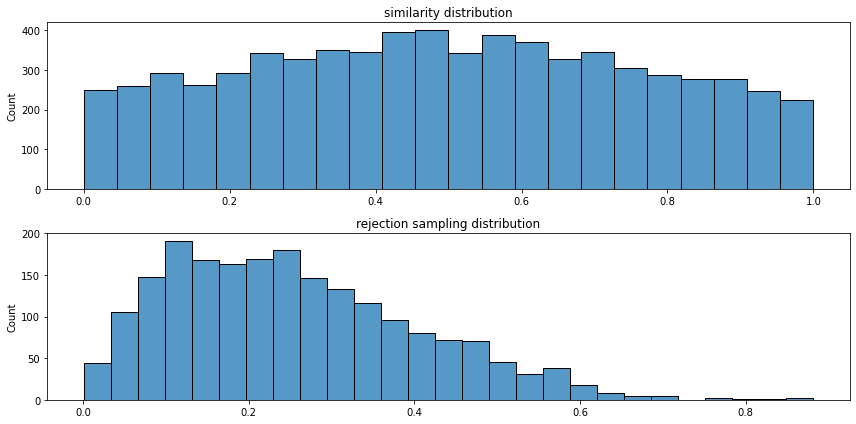

In [17]:
a = 2
b = 6
rv_p = sp.stats.beta(a, b)
rv_q = sp.stats.norm(loc = 0.5, scale = 0.5)
k = 5

np.random.seed(0)
x_q0 = rv_q.rvs(int(1e4)) ## rvs() : 랜덤 난수 생성
x_q = x_q0[(x_q0 >= 0) & (x_q0 <=1)]
crits = rv_p.pdf(x_q) / (rv_q.pdf(x_q) * k)
coins = np.random.rand(len(x_q))
x_p = x_q[coins < crits]

plt.figure(figsize = (12, 6))
plt.subplot(211)

sns.histplot(x_q, kde = False)
plt.title('similarity distribution')
plt.subplot(212)

sns.histplot(x_p, kde = False)
plt.title('rejection sampling distribution')
plt.tight_layout()
plt.show()


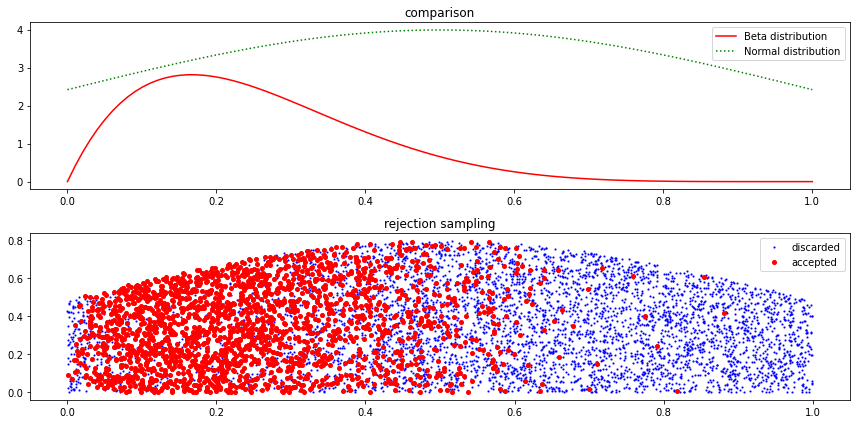

In [18]:
plt.figure(figsize = (12, 6))
plt.subplot(211)
xx = np.linspace(0, 1, 100)
plt.plot(xx, rv_p.pdf(xx), 'r-', label = 'Beta distribution')
plt.plot(xx, rv_q.pdf(xx) * k, 'g:', label = 'Normal distribution')
plt.legend()
plt.title('comparison')
plt.subplot(212)
y = np.random.rand(len(x_q)) * rv_q.pdf(x_q)
plt.plot(x_q, y, 'bs', ms = 1, label = 'discarded')
ids = coins < crits
plt.plot(x_q[ids], y[ids], 'ro', ms = 4, label = 'accepted')
plt.legend()
plt.title('rejection sampling')
plt.tight_layout()
plt.show()


In [30]:


import pymc3 as pm
import mkl

In [32]:
pip install theano


     ---------------------------------------- 2.8/2.8 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668124 sha256=fb576afa9bc594627bfb8d96e0141129da1d1b6fd33ca99707e33a9a2a00e3bb
  Stored in directory: c:\users\kyeongtae\appdata\local\pip\cache\wheels\12\d8\36\e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Note: you may need to restart the kernel to use updated packages.
Successfully built theano


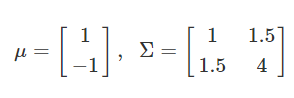
인 2차원 가우시안 표본을 생성한다.

### PyMC3 사용법
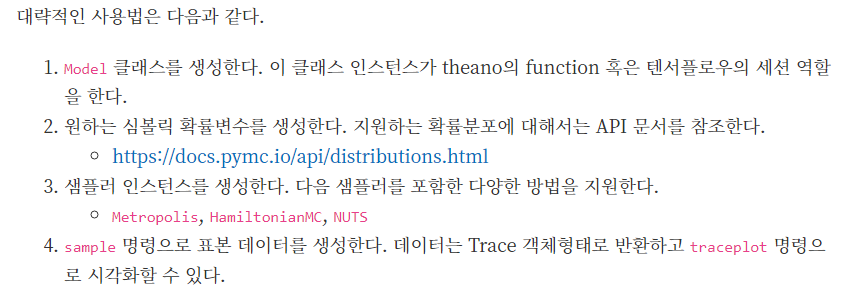


In [33]:
cov = np.array([[1., 1.5], [1.5, 4]])
mu = np.array([1, -1])

with pm.Model() as model:
    x = pm.MvNormal('x', mu = mu, cov = cov, shape = (1, 2))
    step = pm.Metropolis()
    trace = pm.sample(1000, step)

import warnings
warnings.simplefilter('ignore')

pm.traceplot(trace)
plt.show()

c:\Users\kyeongtae\Anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
